In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_gep_comparisons(df1, df2, gep_pairs, figsize=(15, 10), ncols=3):
    """
    Create multiple scatterplots comparing GEPs from two dataframes.
    
    Parameters:
    -----------
    df1 : pandas.DataFrame
        First dataframe where rows are GEPs and columns are genes
    df2 : pandas.DataFrame
        Second dataframe where rows are GEPs and columns are genes
    gep_pairs : list of tuples
        List of (df1_row_idx, df2_row_idx) pairs to compare
        Example: [(0, 0), (1, 1), (0, 1), (2, 3)]
    figsize : tuple
        Figure size (width, height)
    ncols : int
        Number of columns in the subplot grid
    
    Returns:
    --------
    fig, axes : matplotlib figure and axes objects
    """
    n_plots = len(gep_pairs)
    nrows = int(np.ceil(n_plots / ncols))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    for idx, (gep1_idx, gep2_idx) in enumerate(gep_pairs):
        ax = axes[idx]
        
        # Extract data
        y = df1.iloc[gep1_idx]  # y-axis values
        x = df2.iloc[gep2_idx]  # x-axis values
        
        # Create scatterplot
        ax.scatter(x, y, alpha=0.6, s=30)
        
        # Add diagonal reference line
        min_val = min(x.min(), y.min())
        max_val = max(x.max(), y.max())
        ax.plot([min_val, max_val], [min_val, max_val], 
                'r--', alpha=0.5, linewidth=1, label='y=x')
        
        # Calculate correlation
        correlation = np.corrcoef(x, y)[0, 1]
        
        # Labels and title
        ax.set_xlabel(f"GEP {gep2_idx + 1}", fontsize=10)
        ax.set_ylabel(f"GEP {gep1_idx + 1}", fontsize=10)
        ax.set_title(f"GEP {gep1_idx + 1} vs GEP {gep2_idx + 1}\n(r = {correlation:.3f})", fontsize=11)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    return fig, axes

## S2, k=6 vs. k=7

In [ ]:
s2_k7 = pd.read_csv('all_datasets_consensus/anal_pc5_c21_S2.filtered_consensus_outputs/anal_pc5_c21_S2.filtered.gene_spectra_score.k_7.dt_0_01.txt', sep='\t')
s2_k7.drop(columns={"Unnamed: 0"}, inplace=True)

In [9]:
s2_k7.iloc[6]

AttributeError: 'NoneType' object has no attribute 'iloc'

In [4]:
s2_k7 = s2_k7.dropna(axis='columns', how='any')
s2_k7.head(7)

,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AARD,AASS,AATK,ABCA1,...,ZNF83,ZNF831,ZNRF1,ZSCAN18,ZSCAN2,ZSCAN26,ZSCAN31,ZSCAN32,ZSWIM9,ZWINT
0,-0.000279,0.0,0.0,-0.000256,-0.000329,-0.000442,0.000165,0.000084,0.000003,0.000478,...,2.594773e-06,0.000123,-0.000071,0.000026,0.000055,0.000083,0.000001,-0.000144,-0.000396,0.000084
1,-0.000230,0.0,0.0,-0.000049,0.000111,0.000562,-0.000076,-0.000086,0.000097,-0.000341,...,-7.340621e-05,-0.000063,0.000130,-0.000127,0.000051,-0.000002,0.000060,0.000095,0.000136,0.000061
2,0.000415,0.0,0.0,0.000254,-0.000019,-0.000170,-0.000009,0.000194,-0.000136,-0.000122,...,-5.111508e-07,-0.000046,-0.000108,0.000089,-0.000089,0.000010,0.000008,-0.000038,-0.000107,-0.000095
3,0.000158,0.0,0.0,-0.000041,-0.000025,-0.000144,-0.000078,-0.000113,0.000237,0.000409,...,-2.953469e-05,-0.000031,-0.000194,0.000024,-0.000049,-0.000051,-0.000058,0.000087,0.000106,-0.000036
4,-0.000156,0.0,0.0,-0.000089,0.000456,-0.000142,0.000162,-0.000045,-0.000042,-0.000178,...,4.337279e-04,0.000140,0.000317,0.000119,0.000032,-0.000018,-0.000055,-0.000035,-0.000026,-0.000081
5,0.000716,0.0,0.0,-0.000107,0.000264,-0.000059,0.000043,0.000040,0.000010,0.000076,...,1.134533e-04,0.000033,0.000135,0.001001,-0.000191,0.000217,0.000312,0.000103,0.000220,0.000082
6,-0.000550,0.0,0.0,0.001306,-0.000331,-0.000446,-0.000425,-0.000413,-0.000548,-0.001120,...,-4.671512e-04,-0.000359,0.000233,-0.002205,0.000661,-0.001075,-0.001410,-0.000853,0.004146,-0.000439


In [5]:
s2_k6 = pd.read_csv('all_datasets_consensus/anal_pc5_c21_S2.filtered_consensus_outputs/anal_pc5_c21_S2.filtered.gene_spectra_score.k_6.dt_0_01.txt', sep='\t')
s2_k6.drop(columns={"Unnamed: 0"}, inplace=True)

In [6]:
s2_k6 = s2_k6.dropna(axis='columns', how='any')
s2_k6.head(6)

,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AARD,AASS,AATK,ABCA1,...,ZNF83,ZNF831,ZNRF1,ZSCAN18,ZSCAN2,ZSCAN26,ZSCAN31,ZSCAN32,ZSWIM9,ZWINT
0,-0.000283,0.0,0.0,-0.000246,-0.000329,-0.000441,0.000161,0.000081,3.669316e-07,0.000467,...,-5.699250e-07,0.000119,-0.000070,0.000007,0.000055,0.000076,-0.000008,-0.000148,-0.000370,0.000081
1,-0.000230,0.0,0.0,-0.000042,0.000109,0.000559,-0.000078,-0.000088,9.489876e-05,-0.000343,...,-7.567689e-05,-0.000065,0.000130,-0.000139,0.000049,-0.000006,0.000053,0.000090,0.000151,0.000059
2,0.000408,0.0,0.0,0.000262,-0.000022,-0.000173,-0.000012,0.000191,-1.389308e-04,-0.000128,...,-3.519205e-06,-0.000048,-0.000107,0.000072,-0.000087,0.000003,-0.000002,-0.000044,-0.000084,-0.000097
3,0.000154,0.0,0.0,-0.000035,-0.000027,-0.000145,-0.000079,-0.000114,2.346563e-04,0.000403,...,-3.163958e-05,-0.000033,-0.000193,0.000011,-0.000055,-0.000056,-0.000065,0.000083,0.000123,-0.000038
4,-0.000158,0.0,0.0,-0.000087,0.000442,-0.000142,0.000156,-0.000045,-4.509995e-05,-0.000174,...,4.216577e-04,0.000138,0.000305,0.000108,0.000088,-0.000021,-0.000058,-0.000037,-0.000021,-0.000081
5,0.000495,0.0,0.0,0.000143,0.000158,-0.000127,-0.000039,-0.000039,-8.790637e-05,-0.000134,...,1.093129e-05,-0.000036,0.000150,0.000435,-0.000046,-0.000010,0.000009,-0.000066,0.000910,-0.000009


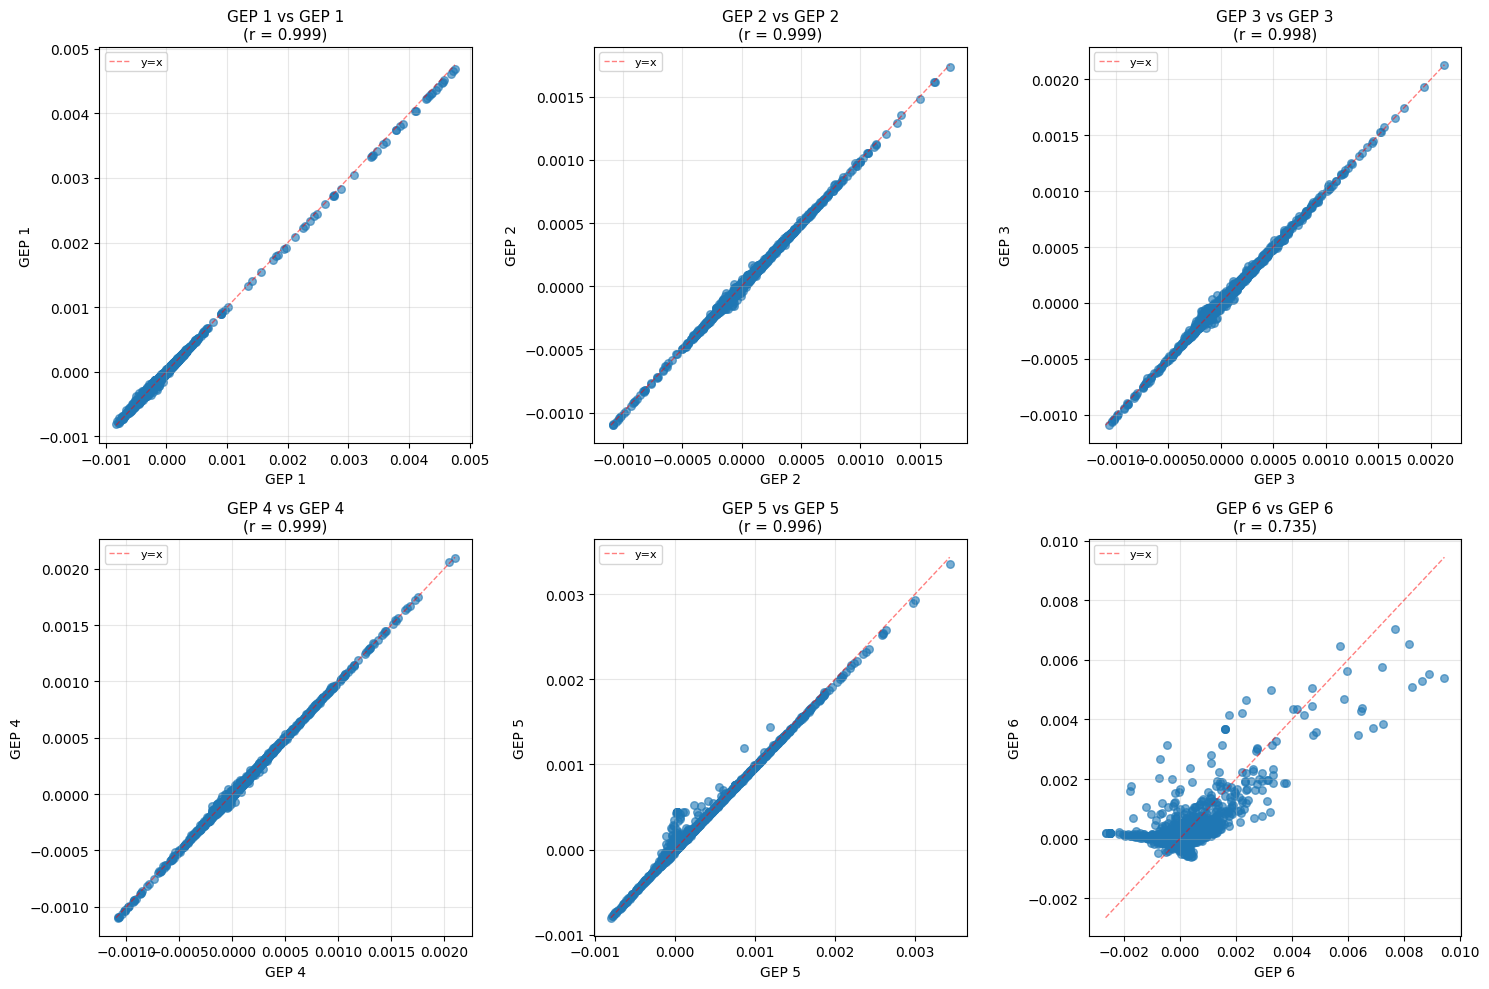

In [7]:
gep_comparisons = [
    (0, 0),  # GEP 1 vs GEP 1
    (1, 1),  # GEP 2 vs GEP 2
    (2, 2),
    (3, 3),
    (4, 4),
    (5, 5),
]

fig, axes = plot_gep_comparisons(s2_k6, s2_k7, gep_comparisons, figsize=(15, 10), ncols=3)
plt.show()

## k=7 vs. k=8

In [8]:
s2_k8 = pd.read_csv('all_datasets_consensus/anal_pc5_c21_S2.filtered_consensus_outputs/anal_pc5_c21_S2.filtered.gene_spectra_score.k_8.dt_0_01.txt', sep='\t')
s2_k8.drop(columns={"Unnamed: 0"}, inplace=True)
s2_k8 = s2_k8.dropna(axis='columns', how='any')
s2_k8.head(6)

,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AARD,AASS,AATK,ABCA1,...,ZNF83,ZNF831,ZNRF1,ZSCAN18,ZSCAN2,ZSCAN26,ZSCAN31,ZSCAN32,ZSWIM9,ZWINT
0,-0.000230,0.0,0.0,-0.000225,-0.000296,-0.000459,0.000172,0.000098,-0.000009,0.000483,...,0.000034,0.000131,-0.000066,0.000031,0.000057,0.000090,0.000005,-0.000139,-0.000399,0.000077
1,-0.000218,0.0,0.0,-0.000035,0.000153,0.000551,-0.000063,-0.000082,0.000083,-0.000355,...,-0.000029,-0.000050,0.000146,-0.000129,0.000045,-0.000003,0.000054,0.000094,0.000138,0.000053
2,0.000172,0.0,0.0,-0.000030,0.000059,-0.000169,-0.000044,-0.000106,0.000217,0.000387,...,0.000063,-0.000006,-0.000157,0.000033,-0.000045,-0.000053,-0.000065,0.000090,0.000099,-0.000053
3,0.000291,0.0,0.0,0.000236,-0.000031,-0.000202,0.000002,0.000149,-0.000160,-0.000164,...,-0.000008,-0.000048,-0.000125,0.000005,-0.000114,-0.000024,-0.000041,-0.000038,-0.000109,-0.000122
4,0.001300,0.0,0.0,0.000381,0.000101,-0.000559,0.000017,0.000259,-0.000192,0.000008,...,-0.000036,-0.000012,0.000372,0.001256,0.000070,0.000258,0.000389,-0.000161,0.000623,0.000091
5,-0.000091,0.0,0.0,-0.000059,0.000117,-0.000148,-0.000053,0.000079,-0.000124,-0.000098,...,0.000100,0.000039,-0.000095,-0.000006,0.002620,-0.000025,-0.000026,-0.000090,-0.000103,-0.000065


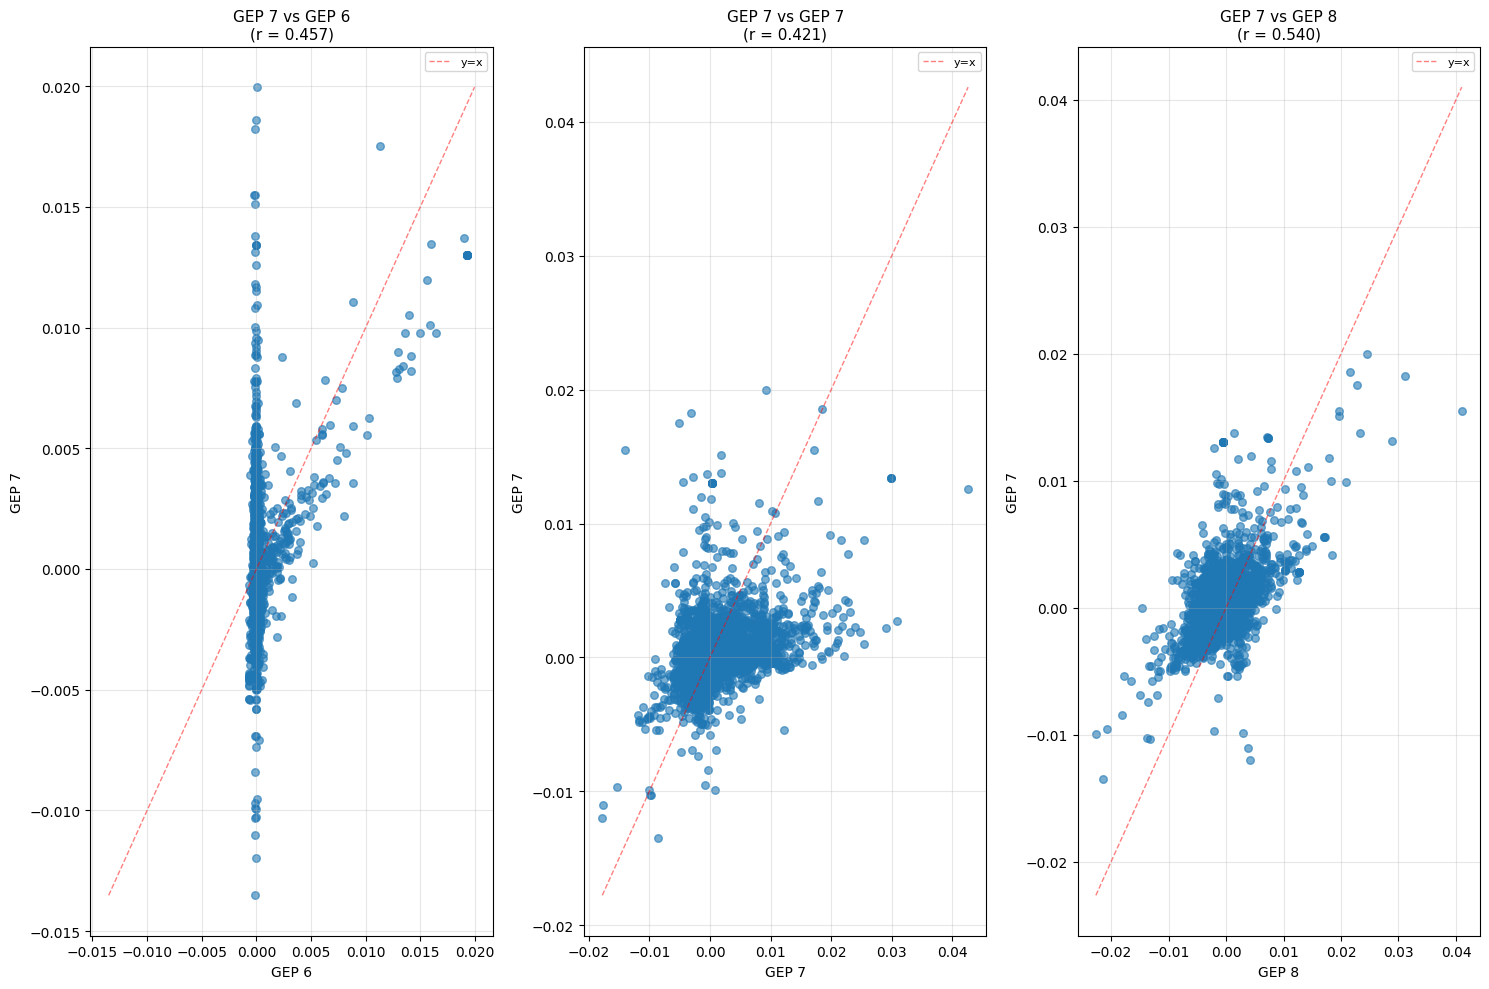

In [9]:
gep_comparisons = [
    (6, 5),
    (6, 6),
    (6, 7)
]

fig, axes = plot_gep_comparisons(s2_k7, s2_k8, gep_comparisons, figsize=(15, 10), ncols=3)
plt.show()